In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
df = pd.read_csv("Instagram-Reach.csv")
df.sample(5)

,Date,Instagram reach
341,2023-03-08T00:00:00,70632
161,2022-09-09T00:00:00,107493
153,2022-09-01T00:00:00,84745
45,2022-05-16T00:00:00,33085
340,2023-03-07T00:00:00,56023


In [29]:
df.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [31]:
df.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [32]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


# Line chart

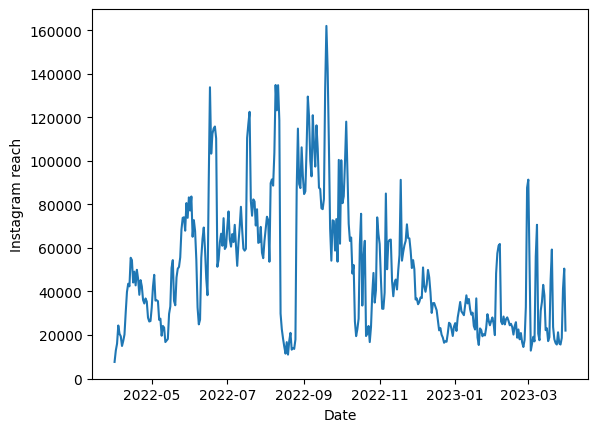

In [33]:
sns.lineplot(x = "Date", y = "Instagram reach", data = df)
plt.show()

# Bar chart

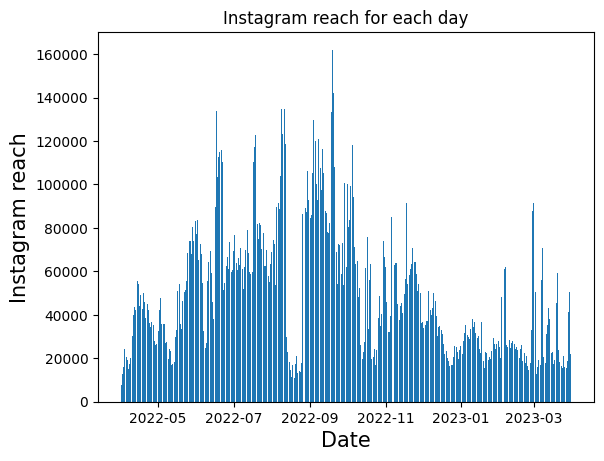

In [34]:
x = df["Date"]
y = df["Instagram reach"]
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Instagram reach", fontsize = 15)
plt.title("Instagram reach for each day")
plt.bar(x,y)
plt.show()

#  box plot

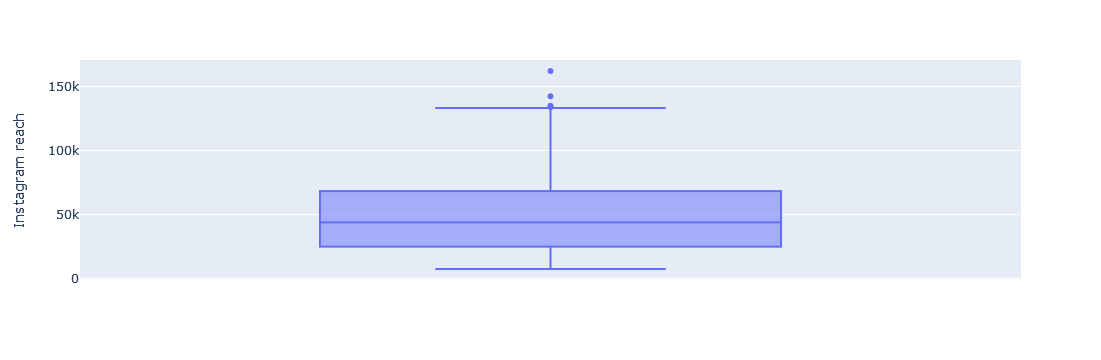

In [35]:
fig = px.box(df, y = "Instagram reach")
fig.show()

In [36]:
df['Day'] = df['Date'].dt.day_name()
grouped_df = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
grouped_df

,Day,mean,median,std
0,Friday,46666.849057,35574.0,29856.943036
1,Monday,52621.692308,46853.0,32296.071347
2,Saturday,47374.750000,40012.0,27667.043634
3,Sunday,53114.173077,47797.0,30906.162384
4,Thursday,48570.923077,39150.0,28623.220625
5,Tuesday,54030.557692,48786.0,32503.726482
6,Wednesday,51017.269231,42320.5,29047.869685


# Bar Chart to to Visualize the reach

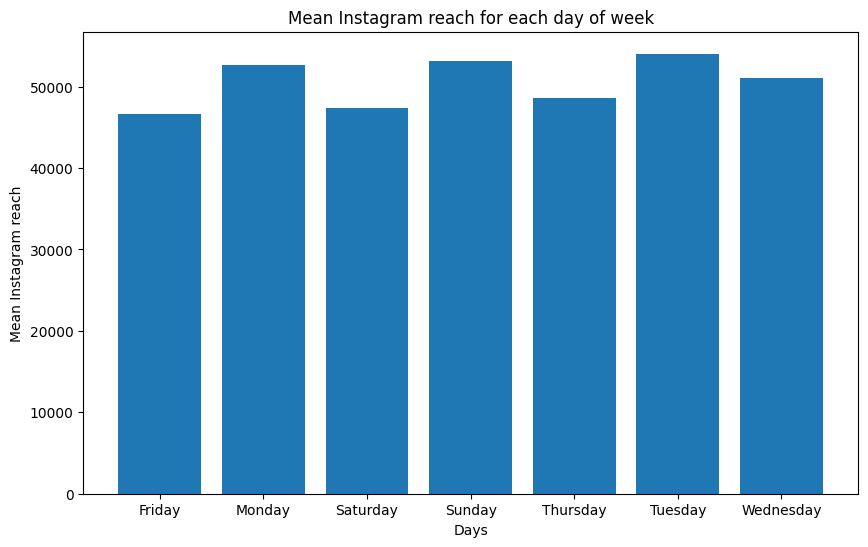

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Day'], grouped_df['mean'])
plt.title('Mean Instagram reach for each day of week')
plt.xlabel('Days')
plt.ylabel('Mean Instagram reach')
plt.show()

# Trend and Seasonal Analysis

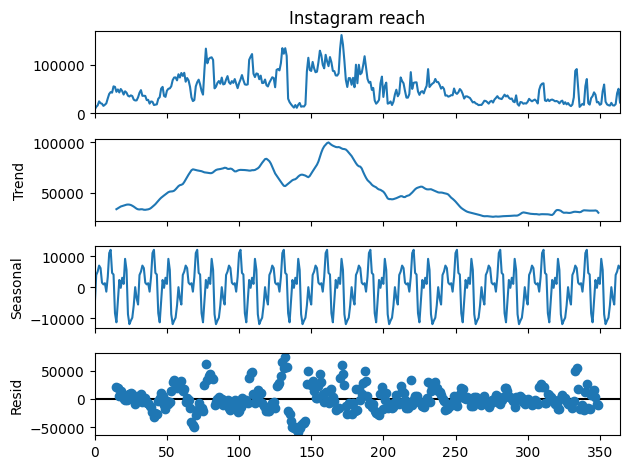

In [38]:
decomposition = sm.tsa.seasonal_decompose(df['Instagram reach'], model='additive', period=30)
fig = decomposition.plot()
plt.show()

# SARIMA

In [39]:
model = SARIMAX(df['Instagram reach'])
model_fit = model.fit(disp=False)
forecast = model_fit.predict(len(df), len(df)+30)

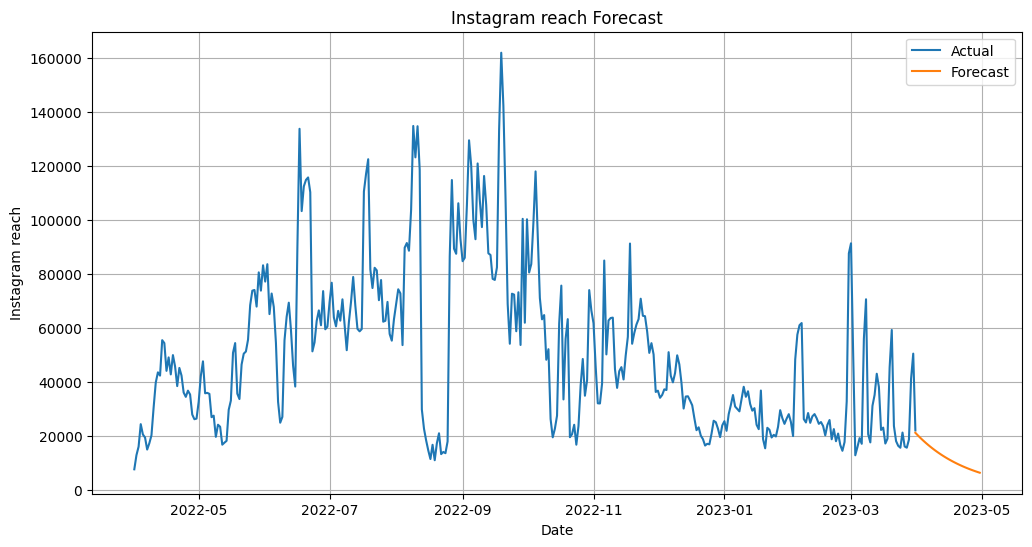

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Instagram reach'], label='Actual')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='D'), forecast, label='Forecast')
plt.title('Instagram reach Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.legend()
plt.grid(True)
plt.show()